In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [3]:
df=sns.load_dataset('iris')
df

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [4]:
# seperate input and output variable
x=df.drop('species',axis=1)
y=df['species']

<Axes: xlabel='count', ylabel='species'>

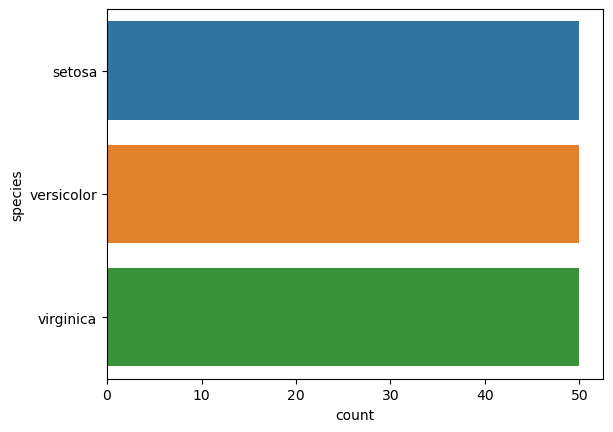

In [5]:
sns.countplot(y=y)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

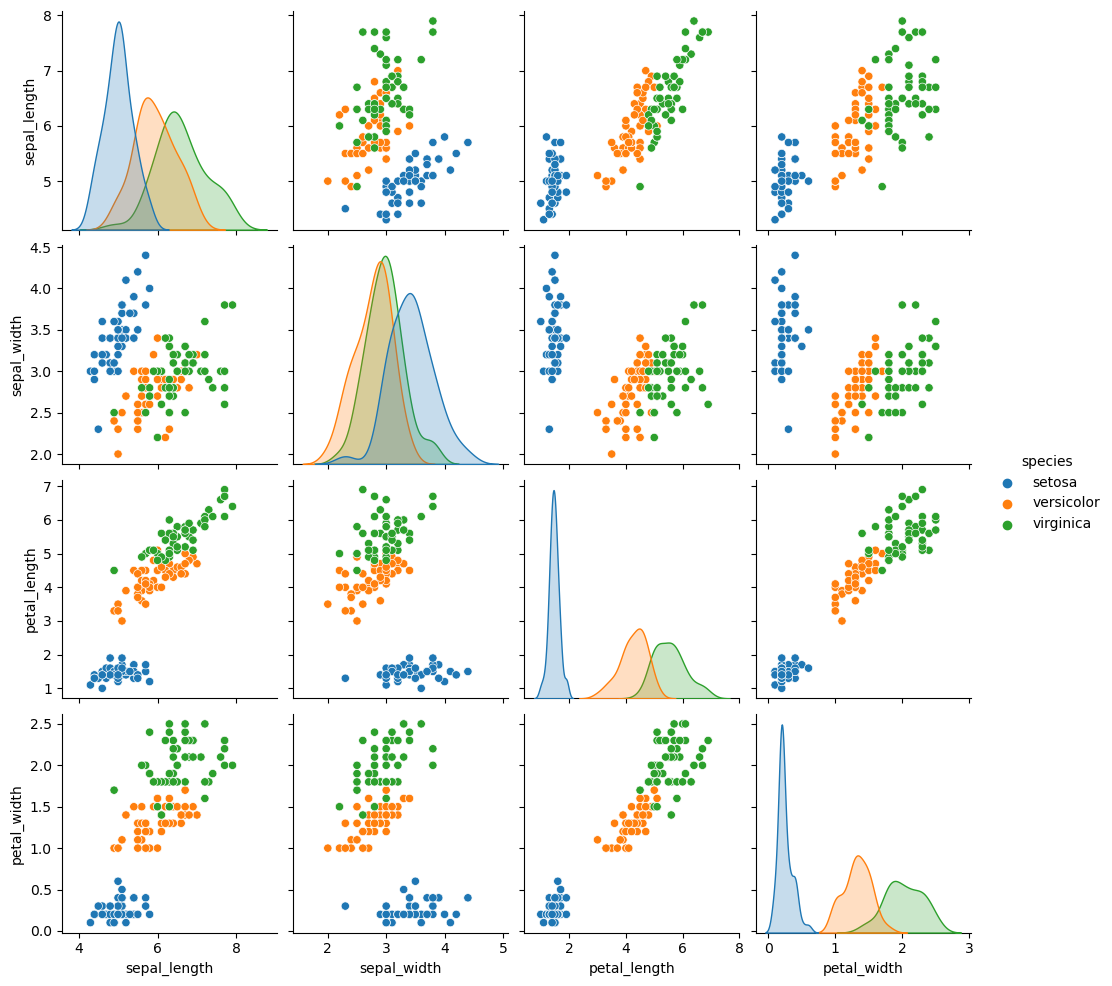

In [7]:
sns.pairplot(df, hue='species')

In [8]:
# feature scale
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [9]:
pd.DataFrame(x_scaled).describe()

0           1           2           3
count  150.000000  150.000000  150.000000  150.000000
mean     0.428704    0.440556    0.467458    0.458056
std      0.230018    0.181611    0.299203    0.317599
min      0.000000    0.000000    0.000000    0.000000
25%      0.222222    0.333333    0.101695    0.083333
50%      0.416667    0.416667    0.567797    0.500000
75%      0.583333    0.541667    0.694915    0.708333
max      1.000000    1.000000    1.000000    1.000000

In [10]:
# Cross Validation
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test= train_test_split(x_scaled,y, random_state=0,stratify=y) # stratify for balancing the data

In [15]:
x_train.shape

(112, 4)

In [16]:
y_train.value_counts()

species
virginica     38
versicolor    37
setosa        37
Name: count, dtype: int64

In [17]:
y_test.value_counts()

species
setosa        13
versicolor    13
virginica     12
Name: count, dtype: int64

In [19]:
#Building  the model
from sklearn.neighbors import KNeighborsClassifier
clf_knn= KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [22]:
y_pred=clf_knn.predict(x_test)
y_pred

array(['setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'setosa', 'virginica', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'virginica', 'setosa', 'versicolor',
       'virginica', 'virginica'], dtype=object)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [24]:
print(confusion_matrix(y_test,y_pred))

[[13  0  0]
 [ 0 13  0]
 [ 0  1 11]]


In [25]:
accuracy_score(y_test,y_pred)

0.9736842105263158

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



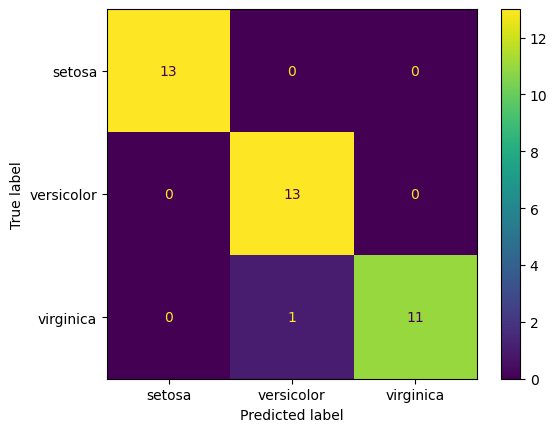

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [29]:
np.mean(y_test!=y_pred)

0.02631578947368421

In [38]:
#Deciding the value of k
error=[]
for k in range(1,101):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    error.append(np.mean(y_test!=pred))

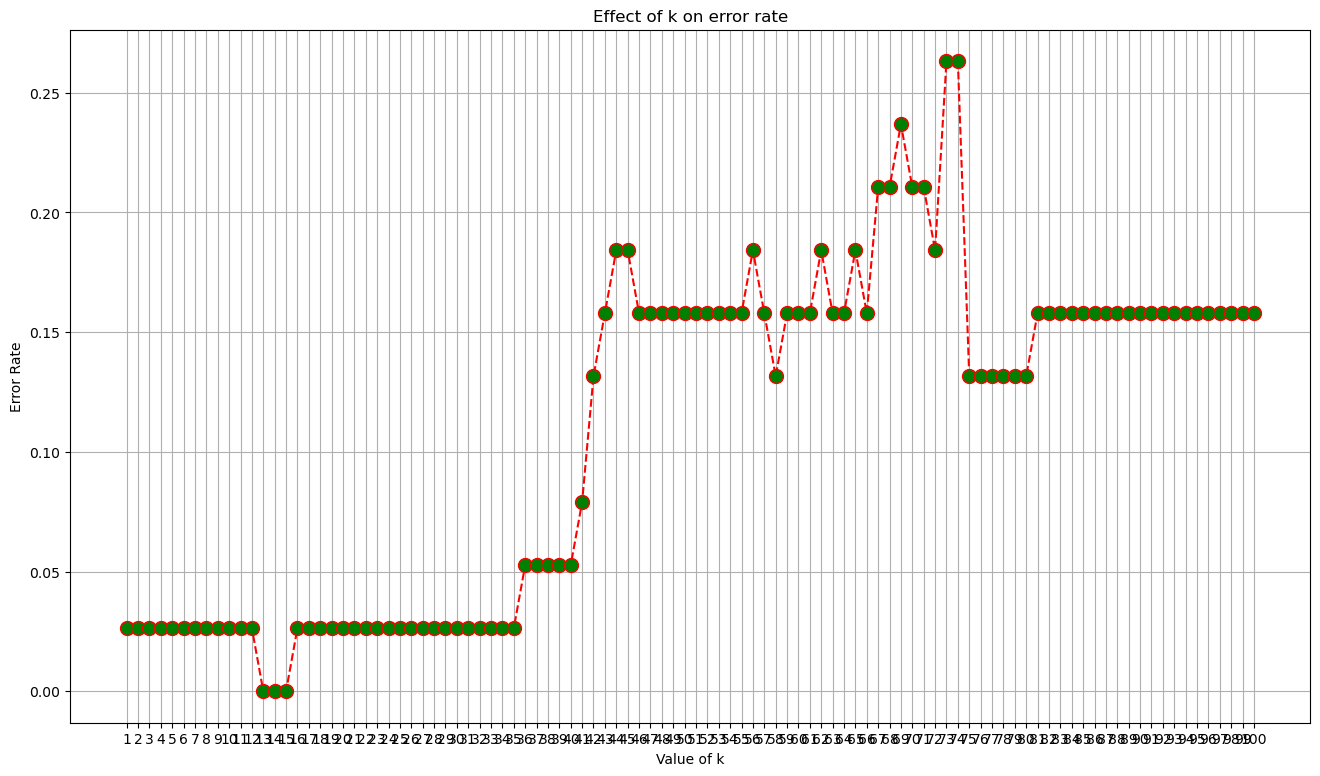

In [40]:
plt.figure(figsize=(16,9))
plt.title('Effect of k on error rate')
plt.grid()
plt.xlabel('Value of k')
plt.ylabel('Error Rate')
plt.xticks(range(1,101))
plt.plot(range(1,101),error, marker='o', color='r', ms=10, mfc='g',ls="--")

In [41]:
clf_knn= KNeighborsClassifier(n_neighbors=13)
clf_knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [42]:
y_pred=clf_knn.predict(x_test)
accuracy_score(y_test, y_pred)

1.0

In [43]:
new= pd.DataFrame(data=[[5.8,2.7,4.1,1.0],
                        [6.1,2.6,5.6,1.4],
                        [5.4,3.4,1.7,0.2]], columns=x.columns)

In [44]:
new

sepal_length  sepal_width  petal_length  petal_width
0           5.8          2.7           4.1          1.0
1           6.1          2.6           5.6          1.4
2           5.4          3.4           1.7          0.2

In [45]:
new_scaled=scaler.transform(new)

In [46]:
new_scaled

array([[0.41666667, 0.29166667, 0.52542373, 0.375     ],
       [0.5       , 0.25      , 0.77966102, 0.54166667],
       [0.30555556, 0.58333333, 0.11864407, 0.04166667]])

In [47]:
y_p=clf_knn.predict(new_scaled)
y_p

array(['versicolor', 'virginica', 'setosa'], dtype=object)